# Counting Objects with OpenCV

Objective: Find the number of legos.

Required to be done

- convert images to gray scale
- edge detection
- thresholding a gray scale image
- finding, counting, and drawing contours
- conducting erosion and dilation
- masking an image

## Importing libraries

In [3]:
import imutils
import cv2
import matplotlib.pyplot as plt

### Importing the image

Load image from disk with OpenCV.

NOTE: OpenCV considers BGR, as we use matplotlib for the visualization, we must apply the function cv2.COLOR_BGR2RGB.

In [35]:
img = cv2.imread("lego.jpg") # To load the image from disk

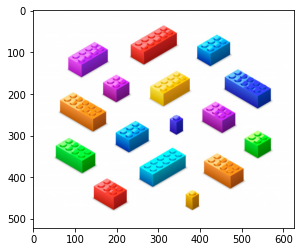

In [36]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # To visualize with matplotlib

### Converting into gray scale

In [37]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Function to convert into gray scale

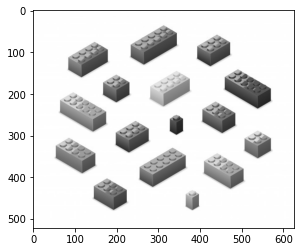

In [38]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### Edge detection

OpenCv offers to us a Canny function, based on the Canny algorithm.

Parameters of the Canny function
- img: image to load
- minVal: a minimum threshold
- maxVal: The maximum threshold
- aperture_size: the Sobel kernel size. By default this value is 3


In [39]:
edged = cv2.Canny(gray, 30, 40)

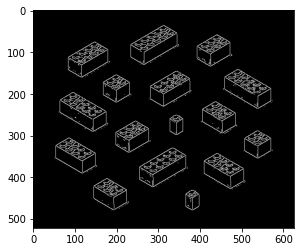

In [40]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### Thresholding

**From OpenCV website**

The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a **grayscale image**. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. 

If an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination. We coniseder cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV. The parameters was choosen by experimentation.

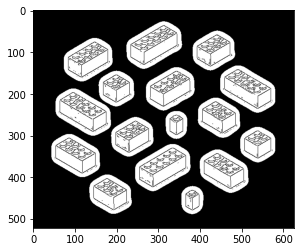

In [41]:
import numpy as np
gray = gray.astype(np.uint8)
thresh = cv2.adaptiveThreshold(edged,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,45,6)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

### Detecting and drawing contours
**From OpenCV website**

What are contours?

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

- For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
- Since OpenCV 3.2, findContours() no longer modifies the source image.
- In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

In cv.findContours() function there are three arguments, first one is source image, second is contour retrieval mode, third is contour approximation method.

In [42]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # To find the contours
cnts = imutils.grab_contours(cnts) # to grab them
output = img.copy() # copying the orginal image to draw the contours

**Drawing the contours**

o draw the contours, cv.drawContours function is used. It can also be used to draw any shape provided you have its boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

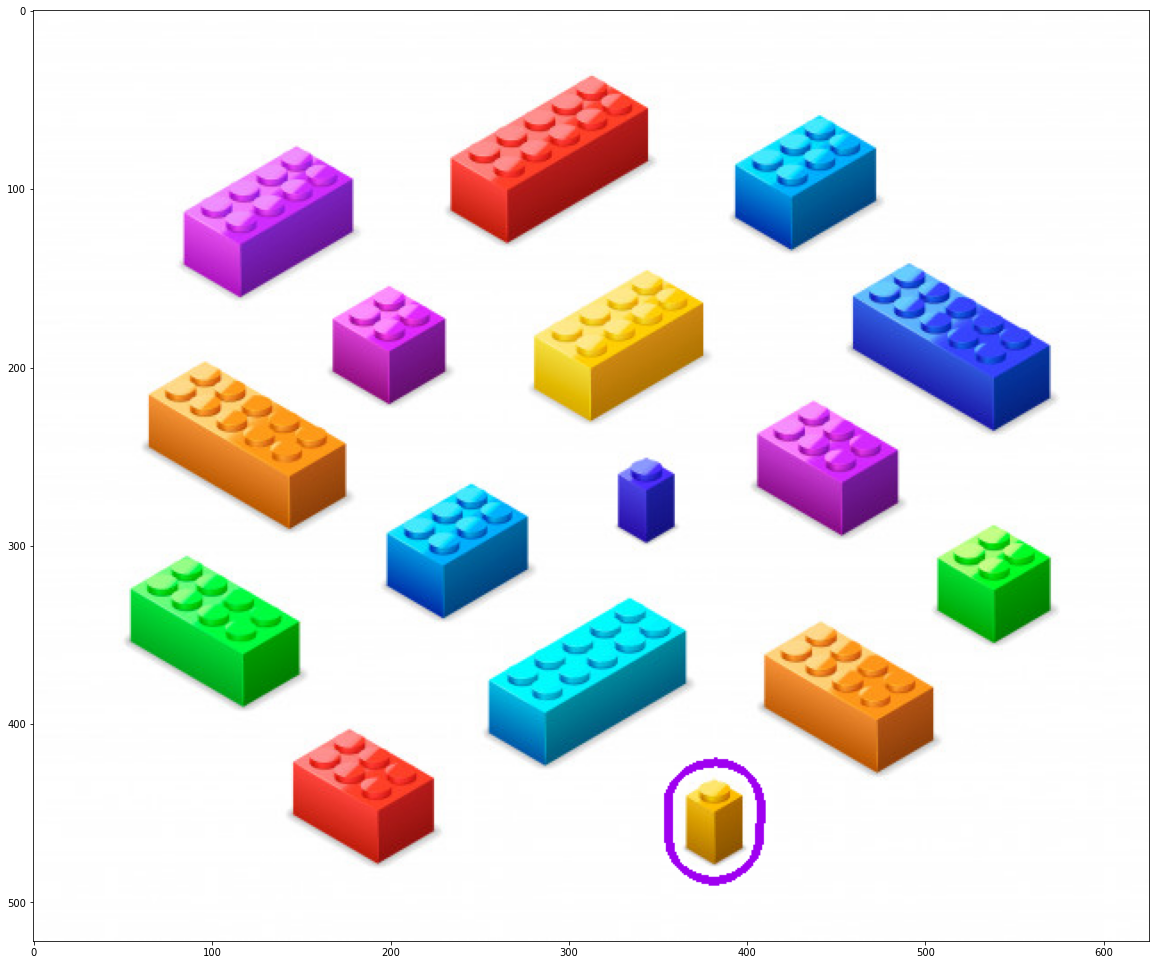

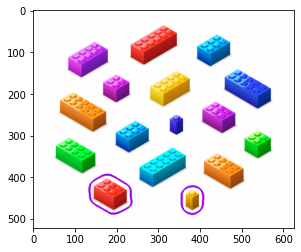

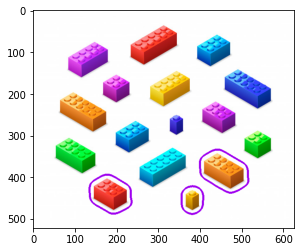

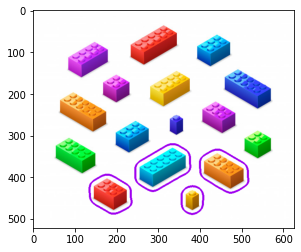

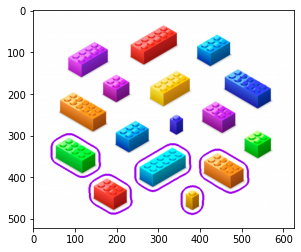

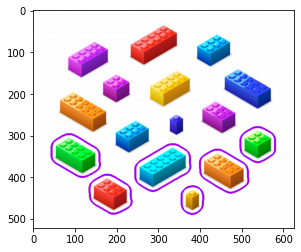

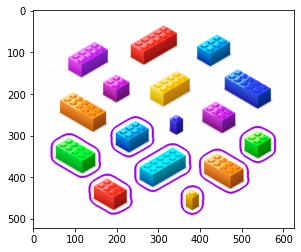

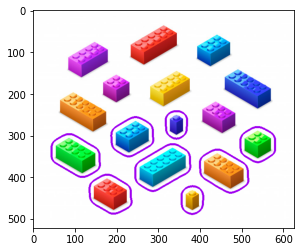

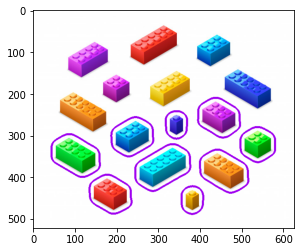

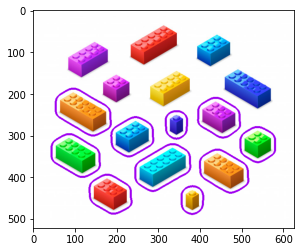

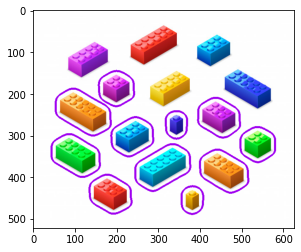

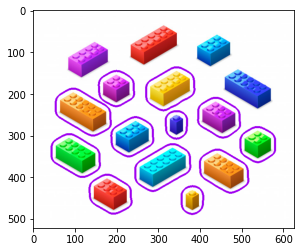

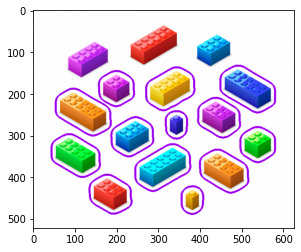

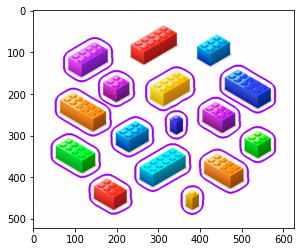

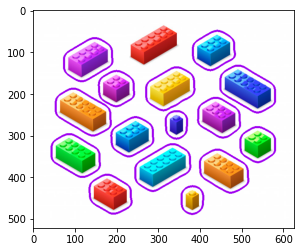

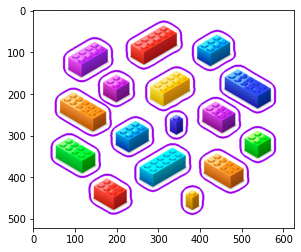

In [43]:
plt.figure(figsize=(20, 20))
for i in cnts:
    cv2.drawContours(output, [i], -1, (240, 0, 159), 3)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.show()

**Couting the number of found objects**

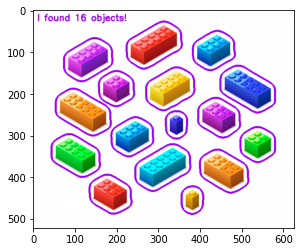

In [44]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (240, 0, 159), 2) #Function to put text in images
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

### Erosions and dilations with masks

**from OpenCV website**

- In short: A set of operations that process images based on shapes. Morphological operations apply a structuring element to an input image and generate an output image.
- The most basic morphological operations are: Erosion and Dilation. They have a wide array of uses, i.e. :
    - Removing noise
    - Isolation of individual elements and joining disparate elements in an image.
    - Finding of intensity bumps or holes in an image

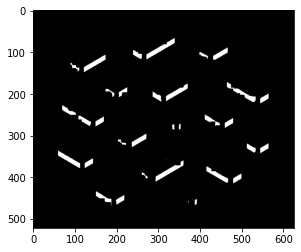

In [45]:
# To reduce the size of objects
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

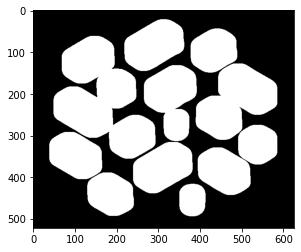

In [46]:
# For dilations 
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

### Bitwise operations

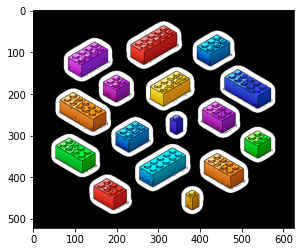

In [47]:
mask = thresh.copy()
output = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

## Conclusions

To count the number of legos, we've converted images to gray scale with OpenCV, this is required to performing edge detection. Once we had found the edges in the image, we deploy the threshold to obtain the black background and the white contour of each image. From the thresholding we can find, count and, draw the contours. We've found 16 legos.
Beyond the count, we deployed the mask with erosion and dilatation. Finally, the bit wise operation, that conserves the black background and convert the contour regions into a RGB scale. All of these techniques are useful to the image pre-process, it can reduce the noisy, for example.